In [10]:
# Import the dependencies and API key.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(68.81117459124357, -7.541313169044969),
 (-7.591880153943123, -62.03493754803941),
 (56.36659474982784, -84.89372354208672),
 (87.98946206278492, -179.78430929034516),
 (-35.26875116350513, -155.71834077220842),
 (-3.1910124887924667, 119.64489650693855),
 (-25.69761994180115, -112.04455237143728),
 (4.927667537355163, 14.322953313203357),
 (9.073876979669336, 127.62225273274697),
 (35.28771762562636, 21.553640240508997),
 (-47.37436015218554, 4.256253245055433),
 (52.941067931749274, -46.06866297295258),
 (70.82999861415283, 1.338063876032038),
 (-24.50342557192451, -174.98618182287476),
 (-70.43296981281861, 2.6974780690776186),
 (-87.94796837232619, -7.030956334835537),
 (-11.520648749140676, 86.27281135444252),
 (-70.87448572842348, 128.56389101903545),
 (27.56481497851935, 134.63277564427193),
 (65.49361720235848, 144.16365368075566),
 (-8.01826901417769, -4.564461581627256),
 (64.59709687122404, 7.439859116324982),
 (-59.39748842641197, 61.68603495185857),
 (8.367844874932388, 

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [14]:
# Build basic URL for requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | humaita
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | rantepao
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | batouri
Processing Record 9 of Set 1 | bacolod
Processing Record 10 of Set 1 | methoni
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | roald
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | kushima
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | kristiansund
Processing Record 22 of Se

Processing Record 36 of Set 4 | labuhan
Processing Record 37 of Set 4 | pipar
Processing Record 38 of Set 4 | laela
Processing Record 39 of Set 4 | yima
Processing Record 40 of Set 4 | matara
Processing Record 41 of Set 4 | avarua
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | cayeli
Processing Record 44 of Set 4 | camocim
Processing Record 45 of Set 4 | bellevue
Processing Record 46 of Set 4 | huambo
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | kaupanger
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | buraydah
Processing Record 3 of Set 5 | naryan-mar
Processing Record 4 of Set 5 | murdochville
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | jabiru
City not found. Skipping...
Processing Record 7 of Set 5 | porto velho
Processing Record 8 of Set 5 | buariki
City not found. Skipping...
Processing Record 9 of Se

Processing Record 26 of Set 8 | calbiga
Processing Record 27 of Set 8 | norman wells
Processing Record 28 of Set 8 | kunming
Processing Record 29 of Set 8 | steamboat springs
Processing Record 30 of Set 8 | palafrugell
Processing Record 31 of Set 8 | mahon
Processing Record 32 of Set 8 | taraclia
Processing Record 33 of Set 8 | praia
Processing Record 34 of Set 8 | hurricane
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | beringovskiy
Processing Record 37 of Set 8 | mana
Processing Record 38 of Set 8 | novyy urengoy
Processing Record 39 of Set 8 | ulladulla
Processing Record 40 of Set 8 | phnum penh
City not found. Skipping...
Processing Record 41 of Set 8 | krasnyy oktyabr
Processing Record 42 of Set 8 | myitkyina
Processing Record 43 of Set 8 | vodnyy
Processing Record 44 of Set 8 | sao geraldo do araguaia
Processing Record 45 of Set 8 | bolshaya glushitsa
Processing Record 46 of Set 8 | keokuk
Processing Record 47 of Set 8 | ridgecrest
Processing Record 

Processing Record 13 of Set 12 | carutapera
Processing Record 14 of Set 12 | ola
Processing Record 15 of Set 12 | kaeo
Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | saint anthony
Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | ust-kuyga
Processing Record 20 of Set 12 | akhtubinsk
Processing Record 21 of Set 12 | karasjok
Processing Record 22 of Set 12 | mocuba
Processing Record 23 of Set 12 | torbay
Processing Record 24 of Set 12 | rosarito
Processing Record 25 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 26 of Set 12 | malakal
Processing Record 27 of Set 12 | springdale
Processing Record 28 of Set 12 | nuuk
Processing Record 29 of Set 12 | moron
Processing Record 30 of Set 12 | kralendijk
Processing Record 31 of Set 12 | takhtamygda
Processing Record 32 of Set 12 | ratnagiri
Processing Record 33 of Set 12 | stykkisholmur
Processing Record 34 of Set 12 | quatre cocos
Processing Record 35 of Set 12 | 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,46.40,76,100,24.16,FO,2021-04-17 20:49:26
1,Humaita,-7.5061,-63.0208,79.56,90,100,2.28,BR,2021-04-17 20:51:08
2,Mataura,-46.1927,168.8643,53.01,86,100,8.01,NZ,2021-04-17 20:51:10
3,Rantepao,-2.9701,119.8978,64.90,96,99,2.46,ID,2021-04-17 20:51:11
4,Rikitea,-23.1203,-134.9692,77.23,68,97,8.75,PF,2021-04-17 20:51:11
5,Batouri,4.4333,14.3667,70.75,89,100,2.98,CM,2021-04-17 20:51:11
6,Bacolod,10.6667,122.9500,78.60,79,100,12.28,PH,2021-04-17 20:49:54
7,Methoni,36.8197,21.7049,68.00,56,100,6.91,GR,2021-04-17 20:51:12
8,Cape Town,-33.9258,18.4232,68.00,82,0,3.44,ZA,2021-04-17 20:48:24
9,Nanortalik,60.1432,-45.2371,25.66,54,1,31.43,GL,2021-04-17 20:51:13


In [18]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2021-04-17 20:49:26,62.2266,-6.5890,46.40,76,100,24.16
1,Humaita,BR,2021-04-17 20:51:08,-7.5061,-63.0208,79.56,90,100,2.28
2,Mataura,NZ,2021-04-17 20:51:10,-46.1927,168.8643,53.01,86,100,8.01
3,Rantepao,ID,2021-04-17 20:51:11,-2.9701,119.8978,64.90,96,99,2.46
4,Rikitea,PF,2021-04-17 20:51:11,-23.1203,-134.9692,77.23,68,97,8.75


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

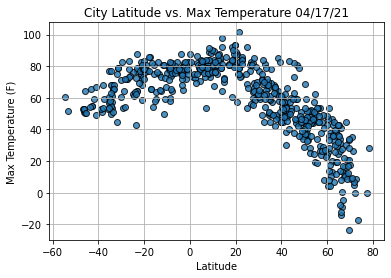

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

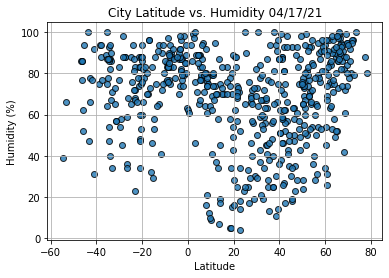

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

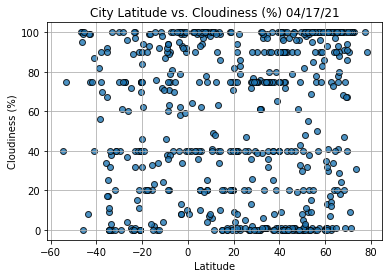

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

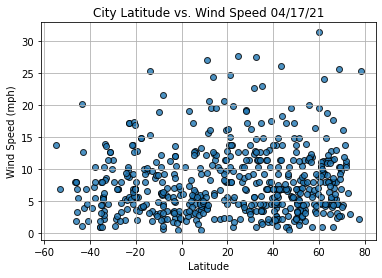

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()